# Data Manipulation with Python jupyter notebook 

#loading a data set and viewing the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [60]:
df=pd.read_csv(r'C:\Users\peddi\Desktop\.CSV files\IMDB-Movie-Data.csv',index_col='Title')

#data viewing 

In [61]:
df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [6]:
df.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [11]:
df.shape

(1000, 12)

GETTING INFORMATION ABOUT DATA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


#HANDLING DUPLICATES VALUES

In [8]:
temp_df=df.append(df)
temp_df=temp_df.append(temp_df)
temp_df.shape

(4000, 12)

In [9]:
temp_df=temp_df.drop_duplicates()

In [10]:
temp_df.shape

(1000, 12)

CLEANING COLUMNS

In [18]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [21]:
df.rename(columns={'Runtime (Minutes)':'runtime_millions','Revenue (Millions)':'revenue_millions'},inplace=True)

In [22]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'runtime_millions', 'Rating', 'Votes', 'revenue_millions', 'Metascore'],
      dtype='object')

HANDLING OUTLIERS IN A COLUMN

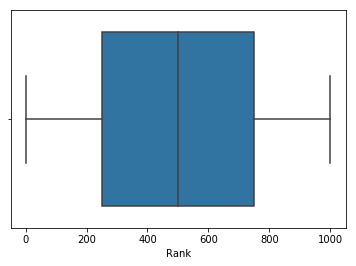

In [23]:
sns.boxplot(df['Rank'])

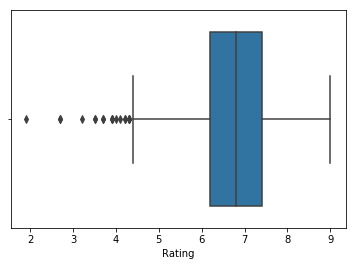

In [24]:
sns.boxplot(df['Rating'])

In [25]:
#we have detected some outliers here

In [34]:
df['new_rating']=np.where(df['Rating']<=5.6,5.6,df['Rating'])

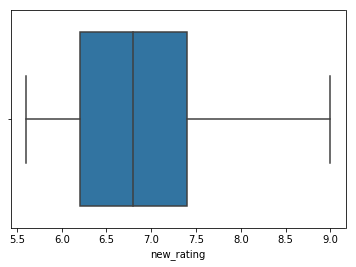

In [35]:
sns.boxplot(df['new_rating'])

#WORKING WITH MISSING VALUES

In [36]:
df.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
runtime_millions      0
Rating                0
Votes                 0
revenue_millions    128
Metascore            64
new_rating            0
dtype: int64

In [38]:
#there are missing values in revenue_millions and metascore
#now we'll replace it with their mean

In [41]:
rev_mean=df.revenue_millions.mean()

In [42]:
df.revenue_millions.fillna(rev_mean,inplace=True)

In [43]:
meta_mean=df.Metascore.mean()

In [44]:
df.Metascore.fillna(meta_mean,inplace=True)

In [45]:
#now we'll check for null values

In [46]:
df.isnull().sum()

Rank                0
Title               0
Genre               0
Description         0
Director            0
Actors              0
Year                0
runtime_millions    0
Rating              0
Votes               0
revenue_millions    0
Metascore           0
new_rating          0
dtype: int64

#UNDERSANDING VARIABLES 

In [47]:
df.describe()

,Rank,Year,runtime_millions,Rating,Votes,revenue_millions,Metascore,new_rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043,6.796800
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,16.634858,0.788474
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000,5.600000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.750000,6.200000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,58.985043,6.800000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,71.000000,7.400000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000,9.000000


In [49]:
df.Director.value_counts()

Ridley Scott            8
Michael Bay             6
Paul W.S. Anderson      6
David Yates             6
M. Night Shyamalan      6
J.J. Abrams             5
Justin Lin              5
Zack Snyder             5
David Fincher           5
Denis Villeneuve        5
Martin Scorsese         5
Antoine Fuqua           5
Danny Boyle             5
Christopher Nolan       5
Woody Allen             5
Peter Berg              5
Ben Affleck             4
Jon Favreau             4
Quentin Tarantino       4
Matthew Vaughn          4
Adam McKay              4
Steven Spielberg        4
Dennis Dugan            4
Francis Lawrence        4
Nicholas Stoller        4
Robert Zemeckis         4
James Wan               4
D.J. Caruso             4
Clint Eastwood          4
Ron Howard              4
                       ..
Dan Gilroy              1
Walter Hill             1
Breck Eisner            1
Patrick Read Johnson    1
Boaz Yakin              1
J.D. Dillard            1
Paco Cabezas            1
Steven Knigh

In [50]:
df.corr()

,Rank,Year,runtime_millions,Rating,Votes,revenue_millions,Metascore,new_rating
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.185159,-0.233192
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.076077,-0.219616
runtime_millions,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.202239,0.400973
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.604723,0.952267
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.318116,0.550781
revenue_millions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.132304,0.208598
Metascore,-0.185159,-0.076077,0.202239,0.604723,0.318116,0.132304,1.000000,0.636965
new_rating,-0.233192,-0.219616,0.400973,0.952267,0.550781,0.208598,0.636965,1.000000


DATA FRAME SLICING SELECTING AND EXTRACTING

In [53]:
subset = df[['Director', 'Rating']]
subset.head()

,Director,Rating
0,James Gunn,8.1
1,Ridley Scott,7.0
2,M. Night Shyamalan,7.3
3,Christophe Lourdelet,7.2
4,David Ayer,6.2


In [54]:
#.loc locates by name
#.iloc locates by index

In [63]:
split=df.loc['Split']
split

Rank                                                                  3
Genre                                                   Horror,Thriller
Description           Three girls are kidnapped by a man with a diag...
Director                                             M. Night Shyamalan
Actors                James McAvoy, Anya Taylor-Joy, Haley Lu Richar...
Year                                                               2016
Runtime (Minutes)                                                   117
Rating                                                              7.3
Votes                                                            157606
Revenue (Millions)                                               138.12
Metascore                                                            62
Name: Split, dtype: object

In [65]:
split=df.iloc[4]
split

Rank                                                                  5
Genre                                          Action,Adventure,Fantasy
Description           A secret government agency recruits some of th...
Director                                                     David Ayer
Actors                Will Smith, Jared Leto, Margot Robbie, Viola D...
Year                                                               2016
Runtime (Minutes)                                                   123
Rating                                                              6.2
Votes                                                            393727
Revenue (Millions)                                               325.02
Metascore                                                            40
Name: Suicide Squad, dtype: object

In [66]:
subset = df.loc['Prometheus':'Sing']
subset = df.iloc[1:4]

subset

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


In [68]:
condition = (df['Director'] == "Ridley Scott")

condition.head()

Title
Guardians of the Galaxy    False
Prometheus                  True
Split                      False
Sing                       False
Suicide Squad              False
Name: Director, dtype: bool

In [71]:
df[df['Director'] == "Ridley Scott"].head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0


In [74]:
df[df['Rating'] >= 8.6].head(3)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


In [76]:
df[(df['Director'] == 'Christopher Nolan') | (df['Director'] == 'Ridley Scott')].head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


In [79]:
df[df['Director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


PLOTTING

<function matplotlib.pyplot.show(*args, **kw)>

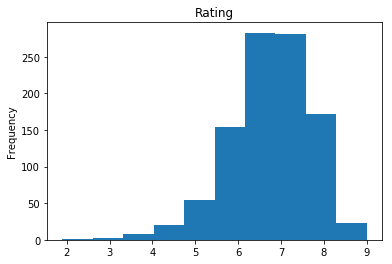

In [82]:
df['Rating'].plot(kind='hist', title='Rating')
plt.show

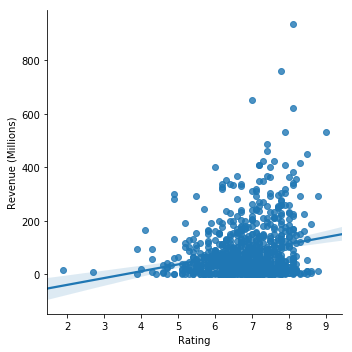

In [87]:
sns.lmplot(x='Rating',y='Revenue (Millions)',data=df)
plt.show()